Lab 2 – Performing Operations with Operator and State Vector

Objective

To understand how unitary operations can be defined and performed on quantum state vectors using Qiskit’s Operator class, and to simulate how quantum states evolve through these operations.

Theory
1. Quantum State Vectors

A quantum state describes the configuration of a quantum system.
For a single qubit, the basic computational basis states are:

∣
0
⟩
=
[
1


0
]
,
∣
1
⟩
=
[
0


1
]
∣0⟩=[
1
0
	​

],∣1⟩=[
0
1
	​

]

A general quantum state can be represented as:

∣
𝜓
⟩
=
𝛼
∣
0
⟩
+
𝛽
∣
1
⟩
∣ψ⟩=α∣0⟩+β∣1⟩

where 
𝛼
,
𝛽
∈
C
α,β∈C (complex numbers) and must satisfy:

∣
𝛼
∣
2
+
∣
𝛽
∣
2
=
1
∣α∣
2
+∣β∣
2
=1
2. Unitary Operations

A unitary operator 
𝑈
U transforms one quantum state into another while preserving probability (norm).
Mathematically, a matrix 
𝑈
U is unitary if:

𝑈
†
𝑈
=
𝐼
U
†
U=I

Common unitary gates:

X (Pauli-X): acts like a NOT gate.

H (Hadamard): creates superposition.

Rₓ(θ): rotation about X-axis.

In Qiskit, we can define custom unitary operators using the Operator class.

3. Qiskit’s Operator and Statevector

The Operator class allows defining custom unitary matrices.

The Statevector class represents and simulates pure quantum states.

Together, they help us simulate how states evolve under given operations.

4. Quantum Circuit Representation

Quantum circuits in Qiskit define a sequence of unitary operations applied to qubits.

In [2]:
from qiskit.quantum_info import Operator, Statevector
from numpy import sqrt


In [3]:
X = Operator([[0, 1], [1, 0]])                             # Pauli-X (NOT) gate
Y = Operator([[0, -1.0j], [1.0j, 0]])                      # Pauli-Y gate
Z = Operator([[1, 0], [0, -1]])                            # Pauli-Z gate
H = Operator([[1/sqrt(2), 1/sqrt(2)], 
              [1/sqrt(2), -1/sqrt(2)]])                    # Hadamard gate
S = Operator([[1, 0], [0, 1.0j]])                          # Phase gate
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])          # T gate (π/8 rotation)


In [4]:
v = Statevector([1, 0])


In [5]:
v = v.evolve(H)   # Apply Hadamard → creates superposition (|0⟩ + |1⟩)/√2
v = v.evolve(T)   # Apply T gate → adds phase shift
v = v.evolve(H)   # Apply H again → changes interference
v = v.evolve(T)   # Apply another T phase
v = v.evolve(Z)   # Apply Pauli-Z → flips phase of |1⟩


In [6]:
display(v.draw("text"))
display(v.draw("latex"))


[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

<IPython.core.display.Latex object>

In [7]:
Statevector([0.7071+0.j, 0.7071+0.j])


Statevector([0.7071+0.j, 0.7071+0.j],
            dims=(2,))


Quantum Meaning

Each gate subtly changes the qubit’s position on the Bloch sphere:

H spreads the qubit into a balanced superposition.

T applies a π/8 phase rotation around the Z-axis.

Z flips the phase of |1⟩.

After applying all these in sequence, the qubit ends in a complex superposition whose amplitudes depend on the combined transformations.

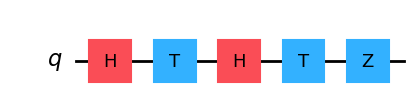

In [9]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

display(circuit.draw(output="mpl"))

In [13]:
ket0 = Statevector([1, 0])
final_state = ket0.evolve(circuit)
display(final_state.draw(output="latex"))

<IPython.core.display.Latex object>

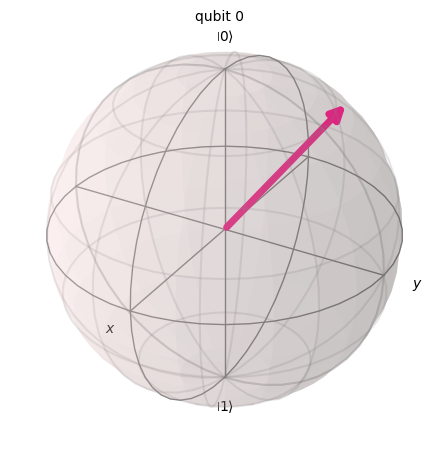

In [14]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(final_state)

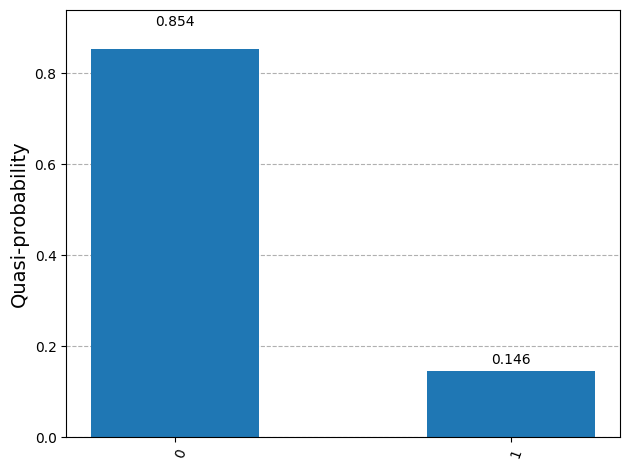

In [16]:
from qiskit.visualization import plot_histogram
stats = final_state.probabilities_dict()
plot_histogram(stats)

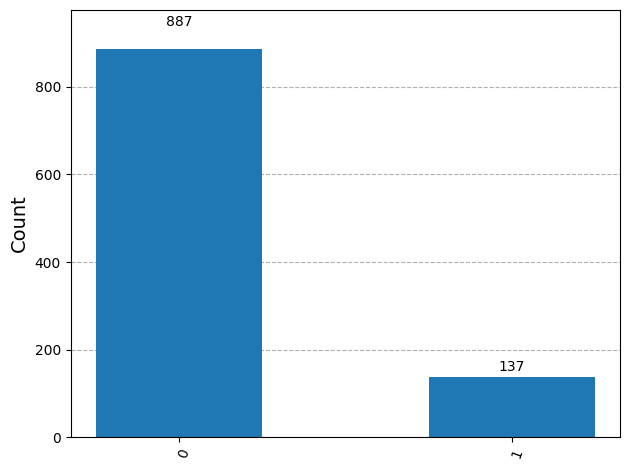

In [17]:
stats = final_state.sample_counts(shots=1024)
plot_histogram(stats)